Project: Emotion classification with Audio Analysis and Model Training for Feature Extraction

Overview: Developed and trained a machine learning model for audio analysis, leveraging Python libraries for feature extraction and model building.
Key Contributions:
Reviewed and utilized specialized Python libraries, including Librosa, for music and audio feature analysis.
Implemented feature extraction pipelines for audio data using sound signal processing techniques.
Built and trained machine learning models, optimizing them for audio classification tasks.
Tools & Technologies: Python, Librosa, machine learning frameworks, signal processing libraries.

In [7]:
pip install gdown

In [8]:
import gdown

# Google Drive file ID
file_id = '1wWsrN2Ep7x6lWqOXfr4rpKGYrJhWc8z7'
# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'
# Specify the output file name
output = 'speech-emotion-recognition-ravdess-data.zip'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1wWsrN2Ep7x6lWqOXfr4rpKGYrJhWc8z7
From (redirected): https://drive.google.com/uc?id=1wWsrN2Ep7x6lWqOXfr4rpKGYrJhWc8z7&confirm=t&uuid=a9024f9f-a55f-45c6-a63b-38f30ac3b891
To: /content/speech-emotion-recognition-ravdess-data.zip
100%|██████████| 78.1M/78.1M [00:01<00:00, 39.2MB/s]


'speech-emotion-recognition-ravdess-data.zip'

In [9]:
# unzip zip file
import zipfile
import os

# Specify the zip file name
zip_file = 'speech-emotion-recognition-ravdess-data.zip'
# Specify the directory to extract to
extract_dir = 'speech-emotion-recognition-ravdess-data'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Extracted files to {extract_dir}')

Extracted files to speech-emotion-recognition-ravdess-data


In [2]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
print(librosa.__version__)
print(soundfile.__version__)
print(sklearn.__version__)

0.10.2.post1
0.12.1
1.5.2


In [4]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [5]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to observe - using only sub-part of dataset
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [10]:
for file in glob.glob("/content/speech-emotion-recognition-ravdess-data/Actor_*[0-9]*/*"):
  file_name = os.path.basename(file)
  print(file_name)

03-01-05-01-02-01-16.wav
03-01-06-01-01-01-16.wav
03-01-06-01-02-01-16.wav
03-01-02-02-02-01-16.wav
03-01-07-01-02-02-16.wav
03-01-05-01-02-02-16.wav
03-01-03-01-01-02-16.wav
03-01-03-02-02-01-16.wav
03-01-06-02-01-01-16.wav
03-01-06-02-01-02-16.wav
03-01-04-02-01-02-16.wav
03-01-03-01-02-01-16.wav
03-01-03-02-01-02-16.wav
03-01-08-01-01-01-16.wav
03-01-04-02-02-02-16.wav
03-01-04-01-01-02-16.wav
03-01-02-01-01-02-16.wav
03-01-05-01-01-01-16.wav
03-01-05-02-01-01-16.wav
03-01-08-02-01-02-16.wav
03-01-04-02-02-01-16.wav
03-01-07-02-02-01-16.wav
03-01-02-01-01-01-16.wav
03-01-07-01-01-02-16.wav
03-01-08-01-01-02-16.wav
03-01-07-01-02-01-16.wav
03-01-05-01-01-02-16.wav
03-01-05-02-02-02-16.wav
03-01-08-02-01-01-16.wav
03-01-01-01-01-01-16.wav
03-01-06-01-02-02-16.wav
03-01-02-02-01-01-16.wav
03-01-03-02-02-02-16.wav
03-01-01-01-02-02-16.wav
03-01-01-01-02-01-16.wav
03-01-02-02-02-02-16.wav
03-01-04-01-01-01-16.wav
03-01-06-02-02-01-16.wav
03-01-04-01-02-02-16.wav
03-01-05-02-01-02-16.wav


In [15]:
!pip install --upgrade librosa


In [16]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            # The first argument to melspectrogram is y or S. Assuming you want to use the raw audio data, use 'y=X'
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [17]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/speech-emotion-recognition-ravdess-data/Actor_*[0-9]*/*"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)

    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [18]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [19]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [20]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [48]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [49]:
#Training the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [50]:
model.score(x_train, y_train)

0.7256944444444444

In [51]:
#Predict for the test set
y_pred=model.predict(x_test)

#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 64.58%


In [52]:
y_pred[:10]

array(['disgust', 'disgust', 'calm', 'calm', 'calm', 'calm', 'disgust',
       'disgust', 'disgust', 'calm'], dtype='<U7')

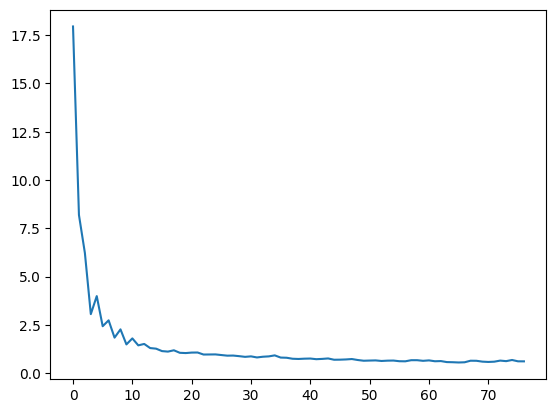

In [53]:
# Plotting graph for MLPClassifier

loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [54]:
model1=MLPClassifier(alpha=0.001, batch_size=128, hidden_layer_sizes=(200, 200, 100, 50), learning_rate='adaptive', max_iter=500)

#Training the model
model1.fit(x_train,y_train)

model1.score(x_train, y_train)

0.7621527777777778

In [55]:
#Predict for the test set
y_pred1=model1.predict(x_test)

#Calculate the accuracy of our model
accuracy1=accuracy_score(y_true=y_test, y_pred=y_pred1)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy1*100))

Accuracy: 67.71%


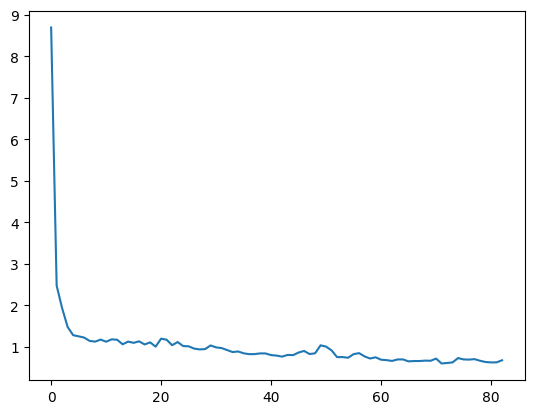

In [56]:
# Plotting graph for MLPClassifier

loss_values1 = model1.loss_curve_
plt.plot(loss_values1)
plt.show()

In [57]:
# Saving the model
import joblib

joblib.dump(model1, 'mlp_classifier_model.pkl')
joblib.dump(model1, 'emotion_classification-model.pkl')

['emotion_classification-model.pkl']